<a href="https://colab.research.google.com/github/mohammadabid-macad/AIAStudioG03/blob/main/Camden_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install osmnx geopandas requests


# Loading Buildings Data

In [21]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


# Define the place name for Camden, London
place_name = "Camden, London, England"

# Fetch building footprints data for Camden
buildings = ox.geometries_from_place(place_name, tags={'building': True})

# Calculate centroids of the buildings
buildings['centroid'] = buildings.centroid

# Display the first few rows of the dataset with centroids
print(buildings[['centroid']].head())

# Save the buildings data with centroids to a GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings, crs='EPSG:4326')


<ipython-input-21-03cb974b7ccc>:11: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_place(place_name, tags={'building': True})
<ipython-input-21-03cb974b7ccc>:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['centroid'] = buildings.centroid


                                         centroid
element_type osmid                               
node         313181151  POINT (-0.13607 51.53636)
             549145588  POINT (-0.10835 51.52045)
             621185181  POINT (-0.10862 51.52043)
             621185197  POINT (-0.10852 51.52126)
             678899716  POINT (-0.11093 51.51971)


# Cleaning Buildings

In [22]:
import geopandas as gpd

# Extract the geometry types
geometry_types = buildings['geometry'].apply(lambda geom: geom.geom_type)

# Create separate columns for points and polygons from the geometry column
buildings['geo_points'] = buildings['geometry'][geometry_types == 'Point']
buildings['geo_polygons'] = buildings['geometry'][geometry_types.isin(['Polygon', 'MultiPolygon'])]

# Display the first few rows of the updated DataFrame
print(buildings[['centroid', 'geo_points', 'geo_polygons']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                         centroid                 geo_points  \
element_type osmid                                                             
node         313181151  POINT (-0.13607 51.53636)  POINT (-0.13607 51.53636)   
             549145588  POINT (-0.10835 51.52045)  POINT (-0.10835 51.52045)   
             621185181  POINT (-0.10862 51.52043)  POINT (-0.10862 51.52043)   
             621185197  POINT (-0.10852 51.52126)  POINT (-0.10852 51.52126)   
             678899716  POINT (-0.11093 51.51971)  POINT (-0.11093 51.51971)   

                       geo_polygons  
element_type osmid                   
node         313181151         None  
             549145588         None  
             621185181         None  
             621185197         None  
             678899716         None  


In [23]:
# Define the list of columns to keep
columns_to_keep = ['name', 'building', 'centroid', 'geo_polygons','addr:postcode',
                   'building:levels', 'roof:levels', 'roof:shape', 'nodes',
                   'building:colour', 'building:material', 'roof:colour']

# Select the relevant columns from the DataFrame
buildings_subset = buildings[columns_to_keep]

# Display the first few rows of the DataFrame with the selected columns
print(buildings_subset.head())


                                               name building  \
element_type osmid                                             
node         313181151  St Pancras Community Centre   public   
             549145588              Johnson Matthey   office   
             621185181                         Grey   office   
             621185197                   etc.venues   office   
             678899716                          NaN    spire   

                                         centroid geo_polygons addr:postcode  \
element_type osmid                                                             
node         313181151  POINT (-0.13607 51.53636)         None           NaN   
             549145588  POINT (-0.10835 51.52045)         None           NaN   
             621185181  POINT (-0.10862 51.52043)         None           NaN   
             621185197  POINT (-0.10852 51.52126)         None           NaN   
             678899716  POINT (-0.11093 51.51971)         None         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Drop rows with NaN values in the 'geo_polygons' column
buildings_subset = buildings_subset.dropna(subset=['geo_polygons'])

# Display the updated DataFrame shape
print("Updated DataFrame shape after dropping rows:", buildings_subset.shape)


Updated DataFrame shape after dropping rows: (25578, 12)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Get the total number of rows in the DataFrame
total_rows = buildings_subset.shape[0]

print("Total number of rows:", total_rows)


# Iterate over each column in the DataFrame
for column in buildings_subset.columns:
    non_nan_values = buildings_subset[column].dropna()
    print(f"Column '{column}':")
  #  print(non_nan_values)
    print("Total non-NaN values:", len(non_nan_values))
    print()

Total number of rows: 25578
Column 'name':
Total non-NaN values: 3447

Column 'building':
Total non-NaN values: 25578

Column 'centroid':
Total non-NaN values: 25578

Column 'geo_polygons':
Total non-NaN values: 25578

Column 'addr:postcode':
Total non-NaN values: 3038

Column 'building:levels':
Total non-NaN values: 6844

Column 'roof:levels':
Total non-NaN values: 2355

Column 'roof:shape':
Total non-NaN values: 1237

Column 'nodes':
Total non-NaN values: 25578

Column 'building:colour':
Total non-NaN values: 1933

Column 'building:material':
Total non-NaN values: 1744

Column 'roof:colour':
Total non-NaN values: 1427



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Get the frequency of each unique entry in the 'building:material' column
material_counts = buildings_subset['building:material'].value_counts()

# Print the frequency of each unique building material
print("Frequency of each unique building material:")
print(material_counts)


Frequency of each unique building material:
building:material
brick             1444
plaster            213
stone               33
concrete            17
glass               13
sandstone           11
panels               6
tiles                2
wood                 2
timber_framing       1
stone;brick          1
block                1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Aggregating Building Types - 'camden_buildings'

In [32]:
# Create the refined mapping dictionary with additional categories
building_type_mapping = {
    'house': 'residential',
    'apartments': 'residential',
    'residential': 'residential',
    'semidetached_house': 'residential',
    'terrace': 'residential',
    'dormitory': 'residential',
    'retail': 'retail',
    'commercial': 'commercial',
    'detached': 'residential',
    'garages': 'other',
    'office': 'office',
    'university': 'education',
    'school': 'education',
    'garage': 'other',
    'roof': 'other',
    'church': 'religious',
    'shed': 'other',
    'service': 'other',
    'industrial': 'industrial',
    'train_station': 'transport',
    'hotel': 'hospitality',
    'pub': 'hospitality',
    'air_shaft': 'other',
    'warehouse': 'industrial',
    'hospital': 'healthcare',
    'construction': 'other',
    'public': 'institution',
    'bridge': 'transport',
    'college': 'education',
    'kiosk': 'commercial',
    'civic': 'institution',
    'block': 'other',
    'no': 'other',
    'healthcare': 'healthcare',
    'bunker': 'other',
    'toilets': 'public',
    'hall_of_residence': 'education',
    'restaurant': 'hospitality',
    'kindergarten': 'education',
    'greenhouse': 'other',
    'conservatory': 'other',
    'tower': 'other',
    'hut': 'other',
    'museum': 'institution',
    'presbytery': 'religious',
    'outbuilding': 'other',
    'chapel': 'religious',
    'silo': 'industrial',
    'cafe': 'hospitality',
    'sports_centre': 'sports',
    'multiple': 'other',
    'air_vent': 'other',
    'commerical': 'commercial',
    'container': 'other',
    'student_residence': 'education',
    'shelter': 'public',
    'ruins': 'other',
    'substation': 'other',
    'transportation': 'transport',
    'balcony': 'other',
    'council_flats': 'residential',
    'disused_station': 'transport',
    'portacabins': 'other',
    'cinema': 'hospitality',
    'boathouse': 'other',
    'artists_studio': 'institution',
    'chimney': 'other',
    'vent_shaft': 'other',
    'library': 'institution',
    'gatehouse': 'institution',
    'sports_hall': 'sports',
    'convent': 'religious',
}

# Print the updated mapping dictionary
print("Building type mapping:")
for building_type, broader_category in building_type_mapping.items():
    print(f"{building_type}: {broader_category}")


Building type mapping:
house: residential
apartments: residential
residential: residential
semidetached_house: residential
terrace: residential
dormitory: residential
retail: retail
commercial: commercial
detached: residential
garages: other
office: office
university: education
school: education
garage: other
roof: other
church: religious
shed: other
service: other
industrial: industrial
train_station: transport
hotel: hospitality
pub: hospitality
air_shaft: other
warehouse: industrial
hospital: healthcare
construction: other
public: institution
bridge: transport
college: education
kiosk: commercial
civic: institution
block: other
no: other
healthcare: healthcare
bunker: other
toilets: public
hall_of_residence: education
restaurant: hospitality
kindergarten: education
greenhouse: other
conservatory: other
tower: other
hut: other
museum: institution
presbytery: religious
outbuilding: other
chapel: religious
silo: industrial
cafe: hospitality
sports_centre: sports
multiple: other
air_ven

In [33]:
# Create a new column 'Category' in the buildings_subset DataFrame based on the mapping dictionary
buildings_subset['Category'] = buildings_subset['building'].map(building_type_mapping)

# Display the updated DataFrame with the new 'Category' column
print(buildings_subset.head())


                                         name    building  \
element_type osmid                                          
way          4237383                      ITN      office   
             4254051          O'Donnell Court  apartments   
             4254054          Foundling Court  apartments   
             4254073          Babington Court  apartments   
             4256244  Holiday Inn, Bloomsbury         yes   

                                       centroid  \
element_type osmid                                
way          4237383  POINT (-0.11416 51.52337)   
             4254051  POINT (-0.12329 51.52447)   
             4254054  POINT (-0.12432 51.52423)   
             4254073  POINT (-0.12055 51.52120)   
             4256244  POINT (-0.12499 51.52387)   

                                                           geo_polygons  \
element_type osmid                                                        
way          4237383  POLYGON ((-0.11445 51.52304, -0.11478 51.5

In [34]:
# Count the number of buildings in each category
category_counts = buildings_subset['Category'].value_counts()

# Print the counts for each category
print("Number of buildings in each category:")
print(category_counts)


Number of buildings in each category:
Category
residential    11265
retail           518
other            420
commercial       269
education        179
office           169
hospitality       54
religious         49
industrial        41
transport         35
institution       19
healthcare        12
public             4
sports             3
Name: count, dtype: int64


In [35]:
# Filter the buildings_subset DataFrame for buildings categorized as 'other'
other_buildings = buildings_subset[buildings_subset['Category'] == 'other']

# Print the unique types of buildings categorized as 'other'
print("Types of buildings categorized as 'other':")
print(other_buildings['building'].unique())


Types of buildings categorized as 'other':
['tower' 'block' 'no' 'multiple' 'garages' 'service' 'portacabins'
 'garage' 'air_shaft' 'roof' 'bunker' 'vent_shaft' 'chimney' 'boathouse'
 'hut' 'construction' 'shed' 'balcony' 'substation' 'conservatory' 'ruins'
 'greenhouse' 'container' 'air_vent' 'outbuilding']


In [36]:
# Create camden_buildings dataset by filtering out 'other' category and renaming 'building' column
camden_buildings = buildings_subset[buildings_subset['Category'] != 'other'].copy()
camden_buildings.rename(columns={'building': 'Sub-Cat'}, inplace=True)

# Display the first few rows of the camden_buildings dataset
print(camden_buildings.head())


                                         name     Sub-Cat  \
element_type osmid                                          
way          4237383                      ITN      office   
             4254051          O'Donnell Court  apartments   
             4254054          Foundling Court  apartments   
             4254073          Babington Court  apartments   
             4256244  Holiday Inn, Bloomsbury         yes   

                                       centroid  \
element_type osmid                                
way          4237383  POINT (-0.11416 51.52337)   
             4254051  POINT (-0.12329 51.52447)   
             4254054  POINT (-0.12432 51.52423)   
             4254073  POINT (-0.12055 51.52120)   
             4256244  POINT (-0.12499 51.52387)   

                                                           geo_polygons  \
element_type osmid                                                        
way          4237383  POLYGON ((-0.11445 51.52304, -0.11478 51.5

In [37]:
# Reorder the columns in camden_buildings dataset
column_order = ['name', 'Category', 'Sub-Cat', 'centroid',  'geo_polygons', 'nodes',
                'building:levels', 'building:material', 'addr:postcode', 'roof:levels', 'roof:shape', 'building:colour', 'roof:colour']

camden_buildings = camden_buildings[column_order]

# Display the first few rows of the updated camden_buildings dataset
print(camden_buildings.head())


                                         name     Category     Sub-Cat  \
element_type osmid                                                       
way          4237383                      ITN       office      office   
             4254051          O'Donnell Court  residential  apartments   
             4254054          Foundling Court  residential  apartments   
             4254073          Babington Court  residential  apartments   
             4256244  Holiday Inn, Bloomsbury          NaN         yes   

                                       centroid  \
element_type osmid                                
way          4237383  POINT (-0.11416 51.52337)   
             4254051  POINT (-0.12329 51.52447)   
             4254054  POINT (-0.12432 51.52423)   
             4254073  POINT (-0.12055 51.52120)   
             4256244  POINT (-0.12499 51.52387)   

                                                           geo_polygons  \
element_type osmid                              

In [38]:
# Count the number of non-NaN values in each column
non_nan_counts = camden_buildings.count()

# Print the number of non-NaN values in each column
print("Number of non-NaN values in each column:")
print(non_nan_counts)


Number of non-NaN values in each column:
name                  3414
Category             12617
Sub-Cat              25158
centroid             25158
geo_polygons         25158
nodes                25158
building:levels       6796
building:material     1738
addr:postcode         3033
roof:levels           2355
roof:shape            1219
building:colour       1927
roof:colour           1412
dtype: int64


In [39]:
# Count the number of buildings in each category
category_counts_camden = camden_buildings['Category'].value_counts()

# Print the counts for each category
print("Number of buildings in each category in Camden:")
print(category_counts_camden)


Number of buildings in each category in Camden:
Category
residential    11265
retail           518
commercial       269
education        179
office           169
hospitality       54
religious         49
industrial        41
transport         35
institution       19
healthcare        12
public             4
sports             3
Name: count, dtype: int64


# Buildings with Levels - 'building_with_levels'

In [41]:
# Create building_with_levels dataset by removing rows with NaN values in 'building:levels' column
building_with_levels = camden_buildings.dropna(subset=['building:levels']).copy()

# Display the first few rows of the building_with_levels dataset
print(building_with_levels.head())


                                   name     Category     Sub-Cat  \
element_type osmid                                                 
way          4254051    O'Donnell Court  residential  apartments   
             4254054    Foundling Court  residential  apartments   
             4254073    Babington Court  residential  apartments   
             4680891    British Library          NaN         yes   
             4960709  North Observatory          NaN         yes   

                                       centroid  \
element_type osmid                                
way          4254051  POINT (-0.12329 51.52447)   
             4254054  POINT (-0.12432 51.52423)   
             4254073  POINT (-0.12055 51.52120)   
             4680891  POINT (-0.12759 51.53004)   
             4960709  POINT (-0.13412 51.52467)   

                                                           geo_polygons  \
element_type osmid                                                        
way          42

In [42]:
# Get the total number of rows in the building_with_levels dataset
total_rows = building_with_levels.shape[0]

# Print the total number of rows
print("Total number of rows:", total_rows)


Total number of rows: 6796


In [44]:

# Calculate the frequency of each unique building type
building_type_counts = building_with_levels['building:levels'].value_counts()

# Set pandas display option to show all rows
pd.set_option('display.max_rows', None)

# Print the frequency of each unique building type
print("Frequency of each unique building type:")
print(building_type_counts)


Frequency of each unique building type:
building:levels
3      2512
4      1885
2      1244
5       467
1       226
6       137
3.5      97
7        58
8        45
9        26
2.5      24
10       14
11        7
4.5       6
13        6
15        5
1.5       5
14        5
22        4
25        4
19        4
12        3
21        3
16        2
20        2
17        1
34        1
3.1       1
0         1
36        1
Name: count, dtype: int64


# PLotting buildings

In [45]:
import geopandas as gpd

# Set the active geometry column to 'centroid'
building_with_levels = building_with_levels.set_geometry('centroid')

# Convert the CRS to British National Grid (EPSG:27700)
building_with_levels_bng = building_with_levels.to_crs(epsg=27700)


In [46]:

# Retrieve the street network for Camden
graph = ox.graph_from_place(place_name, network_type="all")

# Convert the graph to GeoDataFrame of nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

# Convert the graph to the same CRS as the building centroids
graph_proj = ox.project_graph(graph, to_crs=building_with_levels_bng.crs)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


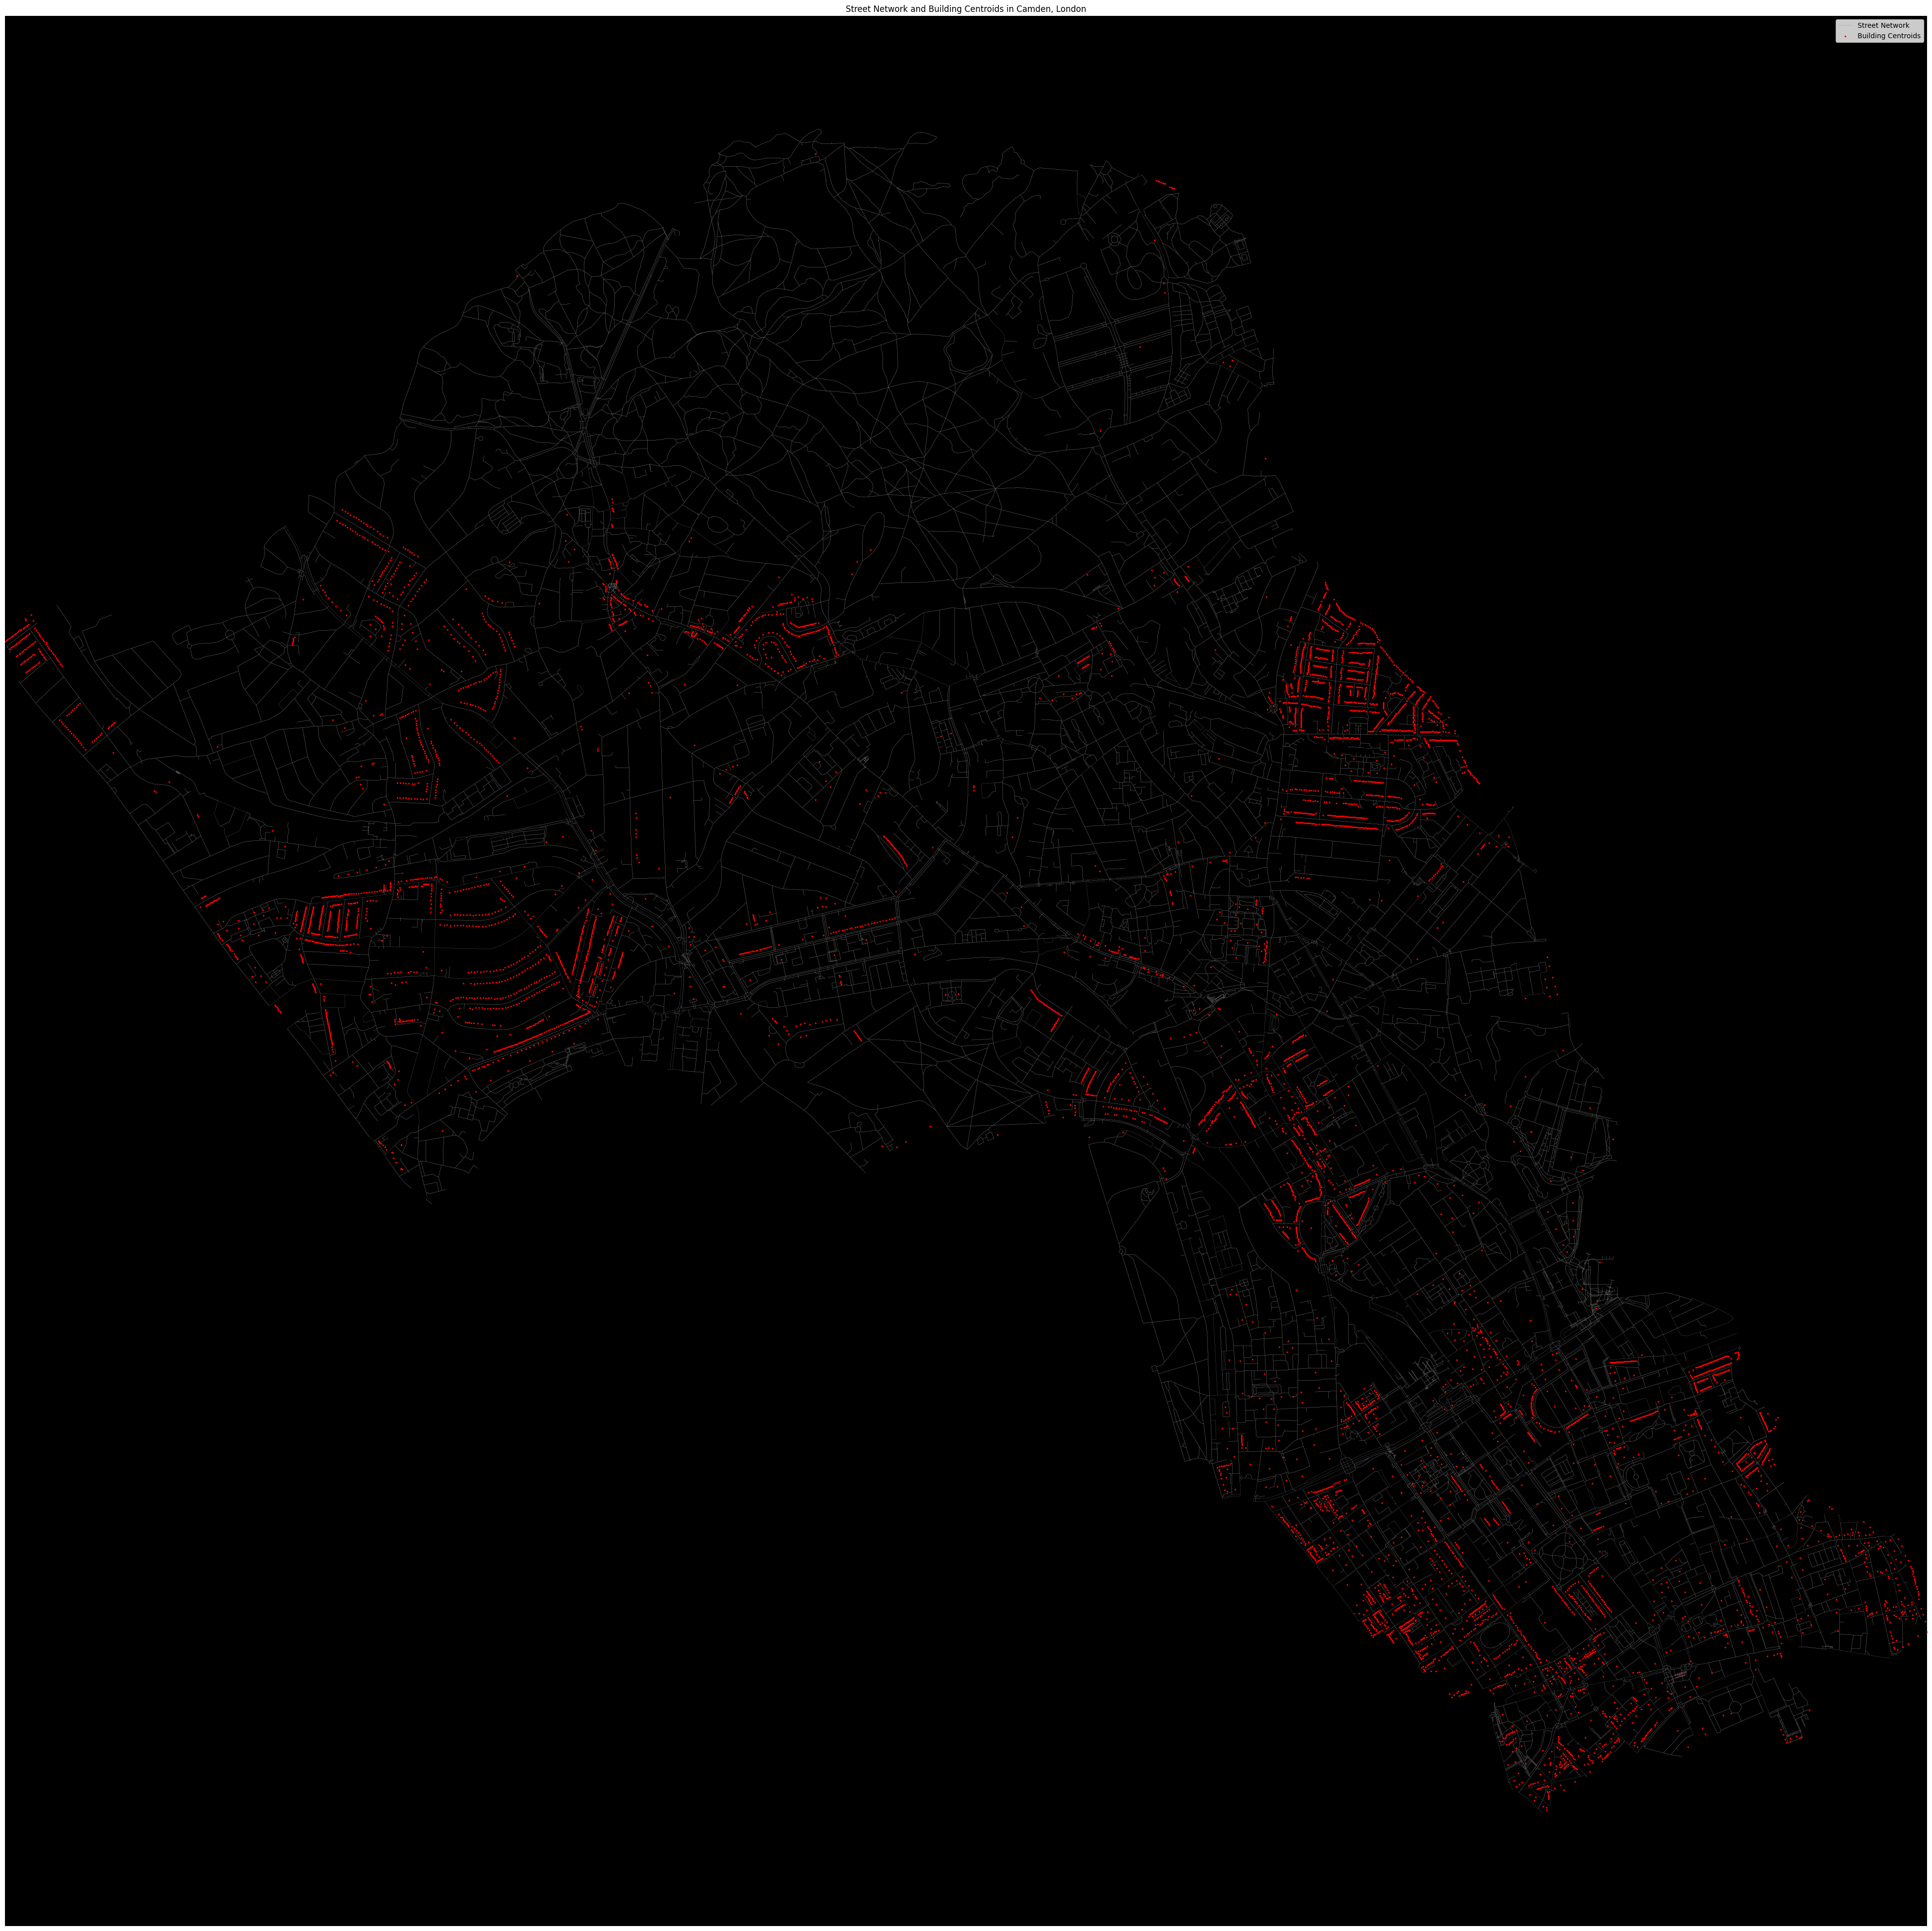

In [47]:
# Plot the street network
fig, ax = ox.plot_graph(graph_proj, edge_color='grey', edge_linewidth=0.2, node_size=0, bgcolor='k', show=False, close=False, figsize=(50, 50))

# Plot the building centroids
building_with_levels_bng.plot(ax=ax, color='red', markersize=2)

# Add legend
plt.legend(['Street Network', 'Building Centroids'])

# Set plot title and labels
plt.title('Street Network and Building Centroids in Camden, London')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.grid(False)
plt.axis('equal')

# Show the plot
plt.show()

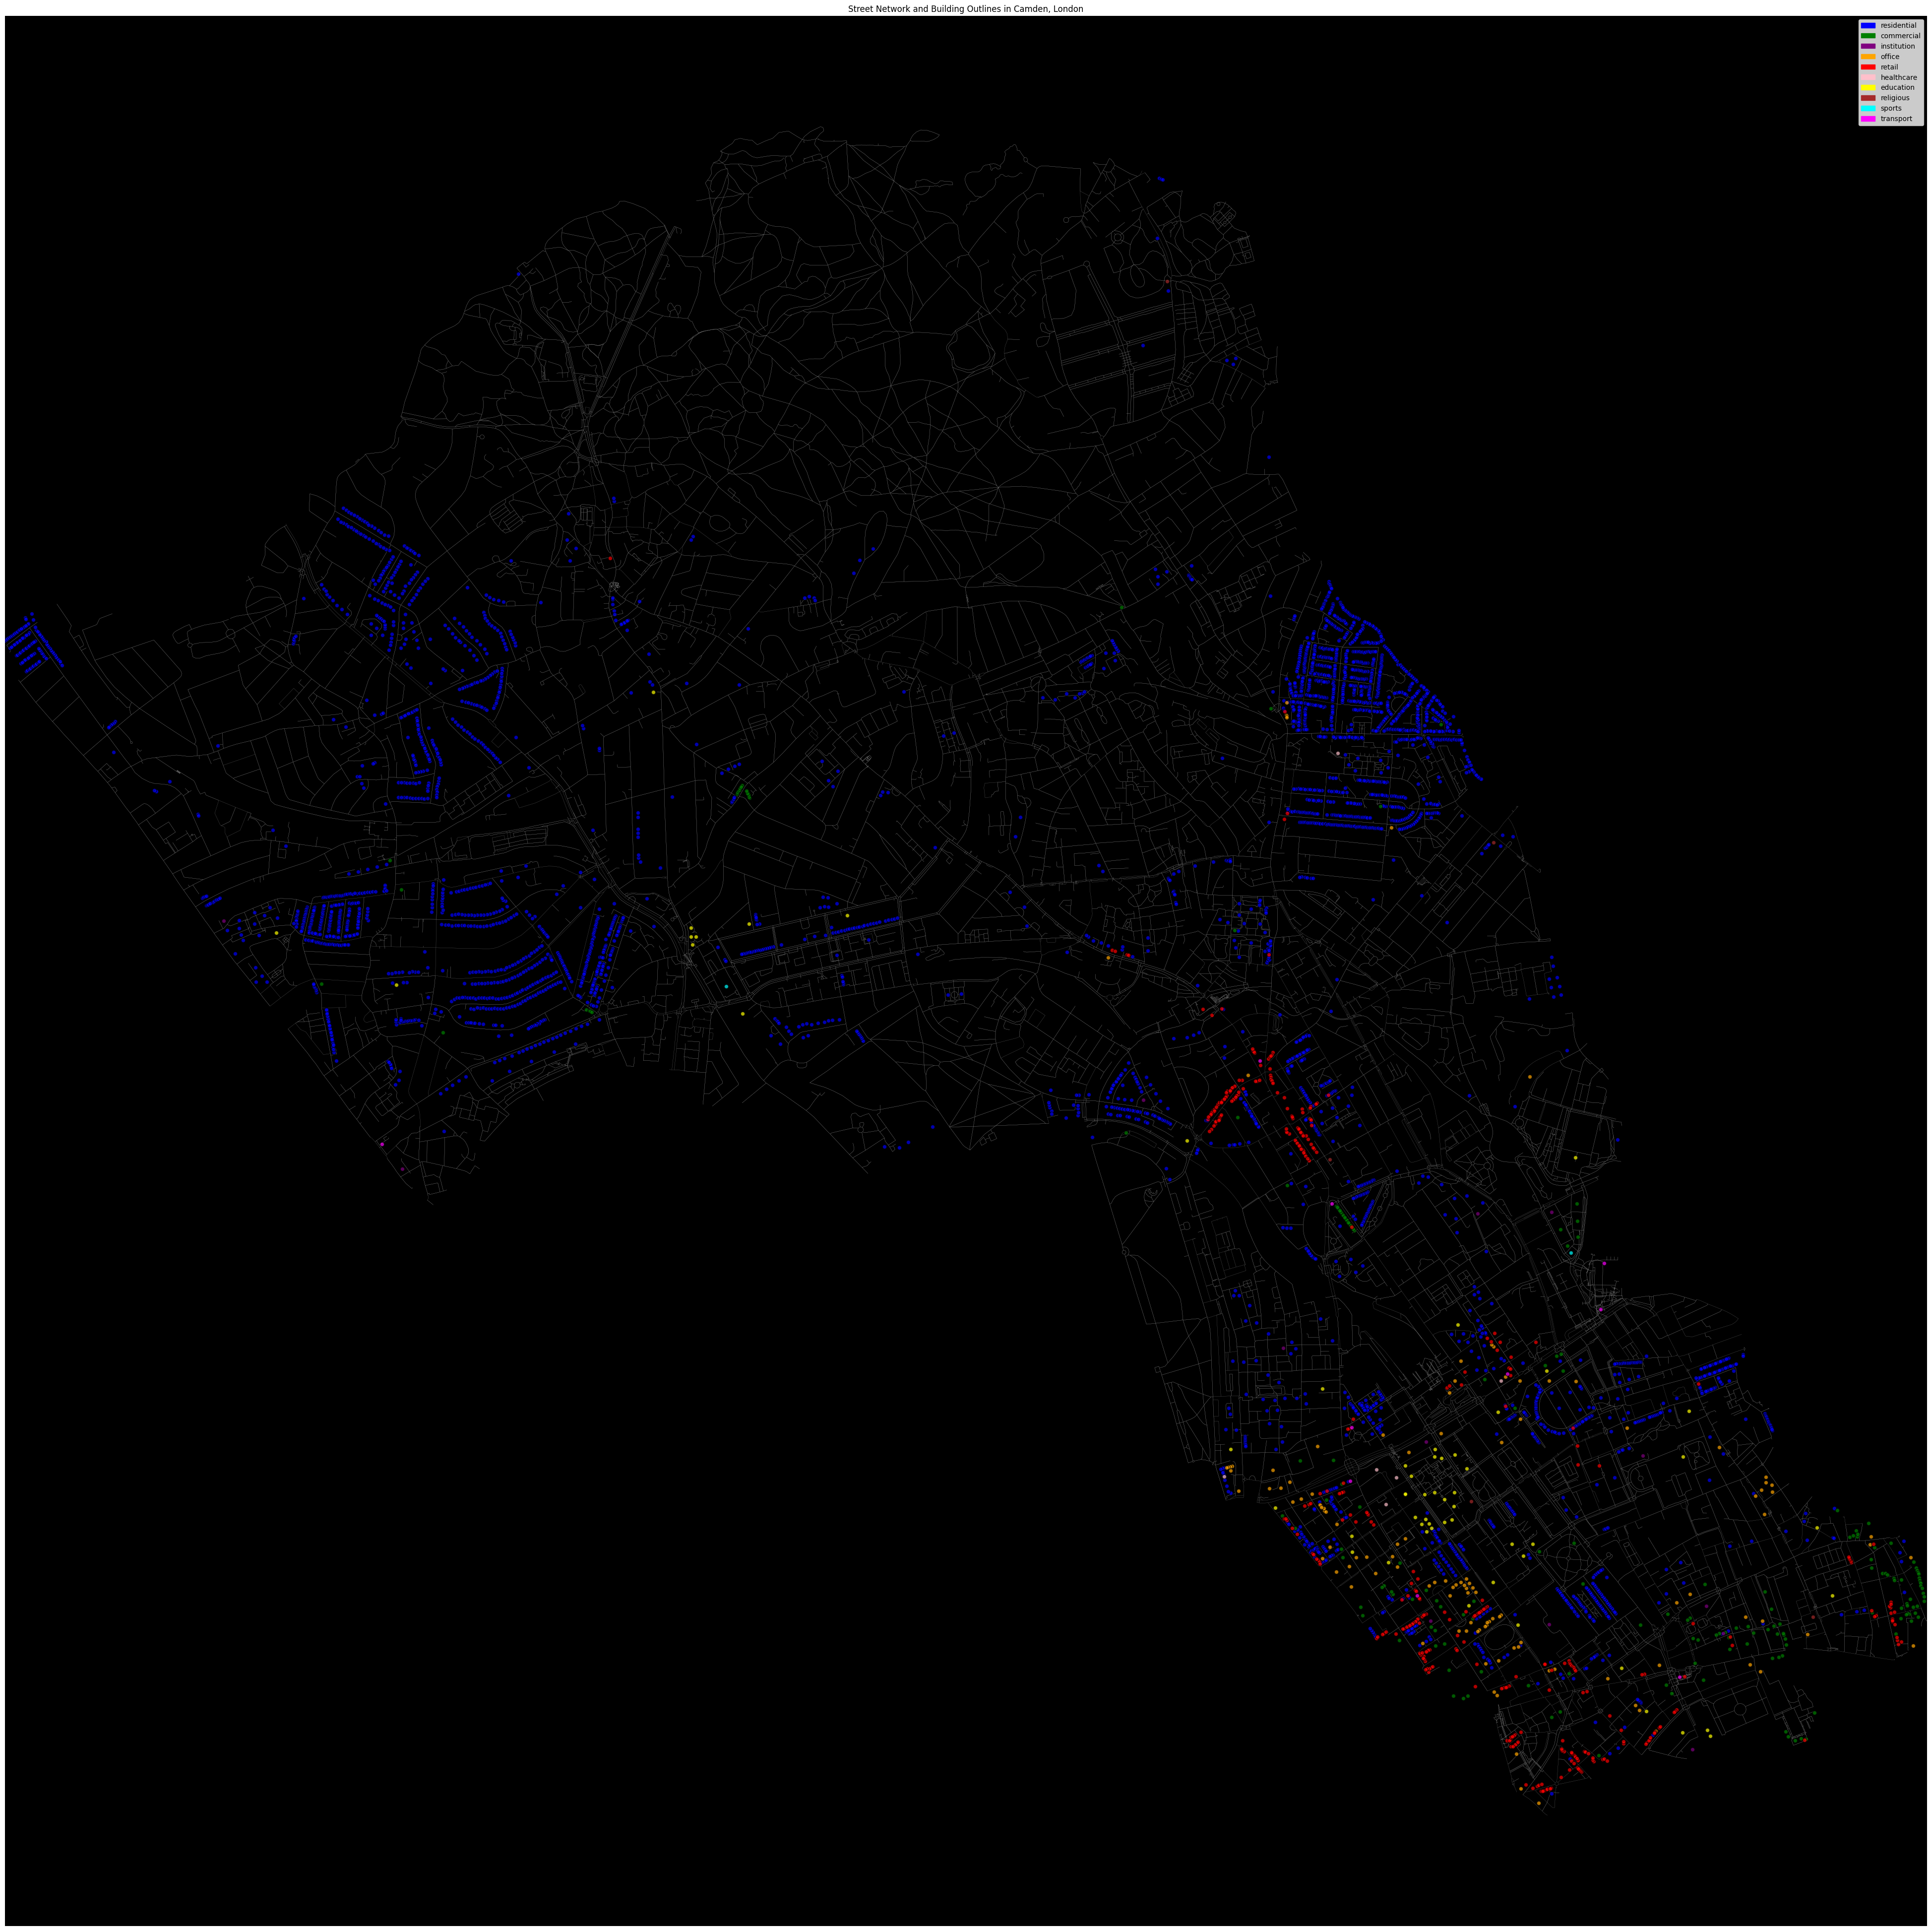

In [48]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Set the CRS of building_with_levels to match the CRS of the street network graph (graph_proj)
building_with_levels = building_with_levels.to_crs(graph_proj.graph['crs'])

# Plot the street network
fig, ax = ox.plot_graph(graph_proj, edge_color='grey', edge_linewidth=0.2, node_size=0, bgcolor='k', show=False, close=False, figsize=(50, 50))

# Define a color map for different categories
category_colors = {
    'residential': 'blue',
    'commercial': 'green',
    'institution': 'purple',
    'office': 'orange',
    'retail': 'red',
    'healthcare': 'pink',
    'education': 'yellow',
    'religious': 'brown',
    'sports': 'cyan',
    'transport': 'magenta',
}

# Plot the building outlines (polygons) with different colors based on categories
for category, color in category_colors.items():
    building_with_levels[building_with_levels['Category'] == category].plot(ax=ax, color=color, alpha=0.7, edgecolor='black')

# Add legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in category_colors.values()]
plt.legend(legend_handles, category_colors.keys())

# Set plot title and labels
plt.title('Street Network and Building Outlines in Camden, London')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.grid(False)
plt.axis('equal')

# Show the plot
plt.show()


In [49]:
# Count the number of buildings in each category
category_counts = building_with_levels['Category'].value_counts()

# Print the counts for each category
print("Number of buildings in each category:")
print(category_counts)


Number of buildings in each category:
Category
residential    3829
retail          383
commercial      188
office          119
education        58
hospitality      24
institution      13
transport        10
healthcare        6
religious         5
industrial        4
sports            2
Name: count, dtype: int64


In [50]:
# Total number of rows
total_rows = len(building_with_levels)

# Categories of buildings
categories = building_with_levels['Category'].unique()

# Print the summary
print("Summary of building_with_levels:")
print("Total Rows:", total_rows)
print("Categories of Buildings:", categories)

# List all columns
all_columns = building_with_levels.columns

# Print the list of columns
print("List of All Columns:")
for column in all_columns:
    print(column)


Summary of building_with_levels:
Total Rows: 6796
Categories of Buildings: ['residential' nan 'healthcare' 'institution' 'office' 'education'
 'hospitality' 'retail' 'commercial' 'industrial' 'transport' 'sports'
 'religious']
List of All Columns:
name
Category
Sub-Cat
centroid
geo_polygons
nodes
building:levels
building:material
addr:postcode
roof:levels
roof:shape
building:colour
roof:colour


# Converting Centroids back to WGS 84 for Google search

In [58]:
import pyproj

# Define the projection transformations
projector = pyproj.Transformer.from_crs(building_with_levels_bng.crs, "epsg:4326", always_xy=True)

# Apply the transformations to convert the coordinates to WGS 84
lon, lat = projector.transform(building_with_levels_bng['centroid'].x.values, building_with_levels_bng['centroid'].y.values)

# Apply the transformations to convert the CRS of geo_polygons
building_with_levels_bng['geo_polygons'] = building_with_levels_bng['geo_polygons'].to_crs("epsg:4326")


# Now, you can use the 'lat' and 'lon' arrays to search for locations using the Google API

In [59]:
building_with_levels.head()

name     Category     Sub-Cat  \
element_type osmid                                                 
way          4254051    O'Donnell Court  residential  apartments   
             4254054    Foundling Court  residential  apartments   
             4254073    Babington Court  residential  apartments   
             4680891    British Library          NaN         yes   
             4960709  North Observatory          NaN         yes   

                                           centroid  \
element_type osmid                                    
way          4254051  POINT (530292.902 182286.049)   
             4254054  POINT (530222.411 182258.100)   
             4254073  POINT (530492.782 181927.455)   
             4680891  POINT (529978.953 182897.739)   
             4960709  POINT (529541.082 182288.825)   

                                                           geo_polygons  \
element_type osmid                                                        
way          4254051  POLYGON ((-0.12300 51.52363, -0.12307 51.52375...   
             4254054  POLYGON ((-0.12401 51.52345, -0.12409 51.52359...   
             4254073  POLYGON ((-0.12038 51.52114, -0.12048 51.52110...   
             4680891  POLYGON ((-0.12892 51.53014, -0.12871 51.53023...   
             4960709  POLYGON ((-0.13416 51.52467, -0.13416 51.52466...   

                                                                  nodes  \
element_type osmid                                                        
way          4254051  [25475726, 2951171633, 2951164831, 2951164823,...   
             4254054  [25475734, 2951178622, 2951178623, 4715890856,...   
             4254073  [25475918, 1834670948, 1834670947, 25475917, 1...   
             4680891  [29740944, 10043418218, 10043418217, 100433969...   
             4960709  [1043439171, 1168327490, 1168327601, 116832749...   

                     building:levels building:material addr:postcode  \
element_type osmid                                                     
way          4254051               8               NaN           NaN   
             4254054               8               NaN           NaN   
             4254073              13               NaN           NaN   
             4680891               5               NaN       NW1 2DB   
             4960709               1               NaN           NaN   

                     roof:levels roof:shape building:colour roof:colour  
element_type osmid                                                       
way          4254051         NaN        NaN             NaN         NaN  
             4254054         NaN        NaN             NaN         NaN  
             4254073         NaN        NaN             NaN         NaN  
             4680891         NaN        NaN             NaN         NaN  
             4960709           1       dome             NaN         NaN

In [60]:
print(building_with_levels.columns)


Index(['name', 'Category', 'Sub-Cat', 'centroid', 'geo_polygons', 'nodes',
       'building:levels', 'building:material', 'addr:postcode', 'roof:levels',
       'roof:shape', 'building:colour', 'roof:colour'],
      dtype='object')


In [61]:
# Get the column types
column_types = building_with_levels.dtypes

# Print the column types
print("Building with Levels Column Types:")
print(column_types)


Building with Levels Column Types:
name                   object
Category               object
Sub-Cat                object
centroid             geometry
geo_polygons         geometry
nodes                  object
building:levels        object
building:material      object
addr:postcode          object
roof:levels            object
roof:shape             object
building:colour        object
roof:colour            object
dtype: object


# Exporting GEoJson

In [85]:
from google.colab import drive
import geopandas as gpd
import os

# Mount Google Drive
drive.mount('/content/mydrive')

# Define the directory path in Google Drive to save the GeoJSON file
drive_directory_path = "/content/mydrive/MyDrive/Camden"

# Create the directory if it doesn't exist
if not os.path.exists(drive_directory_path):
    os.makedirs(drive_directory_path)

# Define the file name and path for the GeoJSON file in Google Drive
geojson_file_name = "building_with_levels.geojson"
geojson_drive_path = os.path.join(drive_directory_path, geojson_file_name)

# Specify the columns to include in the GeoJSON file
columns_to_export = ['name', 'Category', 'Sub-Cat', 'centroid', 'geo_polygons',
                     'building:levels', 'building:material', 'addr:postcode',
                     'roof:levels', 'roof:shape', 'building:colour', 'roof:colour']


Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [86]:

# Copy the GeoDataFrame with only the specified columns
building_with_levels_export = building_with_levels[columns_to_export].copy()

# Ensure all geometry values are properly handled in the geometry column
building_with_levels_export['geometry'] = building_with_levels.apply(lambda row: row['centroid'] if row['centroid'] is not None else row['geo_polygons'], axis=1)

# Drop the individual geometry columns
building_with_levels_export.drop(['centroid', 'geo_polygons'], axis=1, inplace=True)

# Set the geometry column
building_with_levels_export = building_with_levels_export.set_geometry('geometry')

# Save the GeoDataFrame to a GeoJSON file
building_with_levels_export.to_file(geojson_drive_path, driver='GeoJSON')

print("GeoJSON file saved to Google Drive successfully:", geojson_drive_path)

GeoJSON file saved to Google Drive successfully: /content/mydrive/MyDrive/Camden/building_with_levels.geojson


# Import GeoJson

In [98]:
import geopandas as gpd

# Define the URL to the GeoJSON file on GitHub
geojson_url = "https://raw.githubusercontent.com/mohammadabid-macad/AIAStudioG03/39e030351c7e8a26748b8e956520cfb5d0d508e3/building_with_levels.geojson"

# Read the GeoJSON file from the URL into a GeoDataFrame named "camden_buildings_imported"
camden_buildings_imported = gpd.read_file(geojson_url)

# Display the first few rows of the imported GeoDataFrame
print(camden_buildings_imported.head())


  element_type    osmid               name     Category     Sub-Cat  \
0          way  4254051    O'Donnell Court  residential  apartments   
1          way  4254054    Foundling Court  residential  apartments   
2          way  4254073    Babington Court  residential  apartments   
3          way  4680891    British Library         None         yes   
4          way  4960709  North Observatory         None         yes   

  building:levels building:material addr:postcode roof:levels roof:shape  \
0               8              None          None        None       None   
1               8              None          None        None       None   
2              13              None          None        None       None   
3               5              None       NW1 2DB        None       None   
4               1              None          None           1       dome   

  building:colour roof:colour                           geometry  
0            None        None  POINT (530292.9022

In [99]:
# Read the CRS of the 'geometry' column before splitting
crs_geometry = camden_buildings_imported.crs

# Print the CRS information
print("CRS of the 'geometry' column:", crs_geometry)


CRS of the 'geometry' column: EPSG:4326


In [100]:
# Split the 'geometry' column into 'centroid' and 'geo_polygons'
camden_buildings_imported['centroid'] = camden_buildings_imported['geometry'].centroid
camden_buildings_imported['geo_polygons'] = camden_buildings_imported['geometry']

# Split the 'centroid' column into 'lat' and 'lon'
camden_buildings_imported['lat'] = camden_buildings_imported['centroid'].y
camden_buildings_imported['lon'] = camden_buildings_imported['centroid'].x

# Drop the original 'geometry' and 'centroid' columns
camden_buildings_imported = camden_buildings_imported.drop(columns=['geometry', 'centroid'])

# Display the first few rows of the modified GeoDataFrame
print(camden_buildings_imported.head())


  element_type    osmid               name     Category     Sub-Cat  \
0          way  4254051    O'Donnell Court  residential  apartments   
1          way  4254054    Foundling Court  residential  apartments   
2          way  4254073    Babington Court  residential  apartments   
3          way  4680891    British Library         None         yes   
4          way  4960709  North Observatory         None         yes   

  building:levels building:material addr:postcode roof:levels roof:shape  \
0               8              None          None        None       None   
1               8              None          None        None       None   
2              13              None          None        None       None   
3               5              None       NW1 2DB        None       None   
4               1              None          None           1       dome   

  building:colour roof:colour                       geo_polygons  \
0            None        None  POINT (530292.902

<ipython-input-100-a5a67e9f0647>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  camden_buildings_imported['centroid'] = camden_buildings_imported['geometry'].centroid


In [96]:
import requests
import geopandas as gpd
import json

# Define the URL of the raw GeoJSON file on GitHub
github_geojson_url = "https://github.com/mohammadabid-macad/AIAStudioG03/raw/39e030351c7e8a26748b8e956520cfb5d0d508e3/building_with_levels.geojson"

# Fetch the content of the GeoJSON file from the URL
response = requests.get(github_geojson_url)

# Check if the request was successful
if response.status_code == 200:
    # Load the GeoJSON content into a GeoDataFrame
    geojson_data = response.json()
    gdf = gpd.GeoDataFrame.from_features(geojson_data["features"])

    # Print the first few rows of the GeoDataFrame
    print(gdf.head())

    # Print CRS information
    print("CRS of the GeoDataFrame:", gdf.crs)
else:
    print("Failed to fetch the GeoJSON file from the URL.")


                        geometry element_type    osmid               name  \
0  POINT (530292.902 182286.049)          way  4254051    O'Donnell Court   
1  POINT (530222.411 182258.100)          way  4254054    Foundling Court   
2  POINT (530492.782 181927.455)          way  4254073    Babington Court   
3  POINT (529978.953 182897.739)          way  4680891    British Library   
4  POINT (529541.082 182288.825)          way  4960709  North Observatory   

      Category     Sub-Cat building:levels building:material addr:postcode  \
0  residential  apartments               8              None          None   
1  residential  apartments               8              None          None   
2  residential  apartments              13              None          None   
3         None         yes               5              None       NW1 2DB   
4         None         yes               1              None          None   

  roof:levels roof:shape building:colour roof:colour  
0        None